<a href="https://colab.research.google.com/github/ZackWongAPO/Colab/blob/main/Curve_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#二次函数曲线拟合

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import SGD
import numpy
import matplotlib.pyplot as plt

# # 配置TensorFlow使用GPU
# config = tf.ConfigProto()
# config.gpu_options.allow_growth = True
# session = tf.Session(config=config)

>调节输入值定义域对拟合结果有很大影响，主要影响的是收敛速度，由于SGD不能自适应收敛速度，这就导致一旦输入定义域在折线变化的区间之外，需要很多epoch才能达到输入定义域在折线变化内的效果，学习速率同样也和输入数据的尺度相关

##train_on_batch与fit之间的区别

##

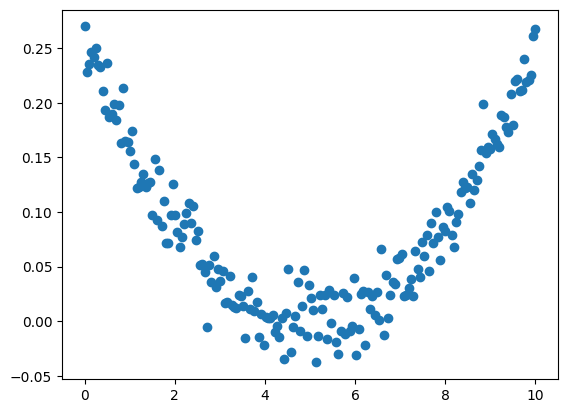

0
[[-0.05160341  0.28039458 -0.3648218  -0.23766531  0.03323916  0.72835743
   0.272431    0.5266332   0.09232967  0.700613  ]] [-1.3082425e-05  7.5342987e-06 -8.2278493e-06  1.1788088e-05
 -1.3315820e-05  3.8731700e-06  6.4383598e-06  5.0710009e-06
 -4.9711102e-06 -9.0231936e-07]
1
[[-0.05165965  0.280421   -0.3648476  -0.23762178  0.03318162  0.728365
   0.27245378  0.52664596  0.0923087   0.7006112 ]] [-2.6152151e-05  1.5063815e-05 -1.6448885e-05  2.3568595e-05
 -2.6619271e-05  7.7444638e-06  1.2872879e-05  1.0139339e-05
 -9.9366698e-06 -1.8032640e-06]
2
[[-0.05171583  0.28044736 -0.36487338 -0.23757829  0.03312415  0.7283726
   0.27247655  0.5266587   0.09228776  0.7006094 ]] [-3.92091970e-05  2.25885542e-05 -2.46631171e-05  3.53415271e-05
 -3.99103701e-05  1.16138835e-05  1.93035630e-05  1.52050161e-05
 -1.48966874e-05 -2.70283658e-06]
3
[[-0.05177194  0.28047374 -0.36489913 -0.23753482  0.03306673  0.72838014
   0.27249932  0.52667147  0.09226684  0.7006076 ]] [-5.2253585e-05  3.

KeyboardInterrupt: 

In [ ]:
data=numpy.linspace(-5,5,200)
noise=numpy.random.normal(0,0.02,data.shape)
y=numpy.square(data/10)+noise
data = data+5

plt.scatter(data,y)# 散点图
plt.show()

model=Sequential()# 按顺序构成的模型，输入层，隐藏层，输出
sgd=SGD(learning_rate=0.001)# 自定义优化算法随机梯度下降法，设置学习率，默认为0.01
# 添加输入层和隐藏层、激活函数
model.add(Dense(units=10,input_dim=1))# DENSE表示全连接层，units=输出值的维度即神经元数量,input_dim=输入值的维度
model.add(Activation('sigmoid'))
model.add(Dense(units=1))# DENSE表示全连接层，units=输出值的维度即神经元数量,input_dim=输入值的维度
model.add(Activation('sigmoid'))

model.compile(optimizer=sgd,loss='mse')# 优化方式,损失函数，评估指标
for i in range(300):
  model.train_on_batch(data, y)# 训练数据，标签，迭代次数，每个批次的样本数
  print(i)
  w,b=model.layers[0].get_weights()# 打印权值和偏置
  print(w,b)

# 训练好的函数
pre=model.predict(data,batch_size=100)
# 画图
plt.scatter(data,y)# 散点图
plt.plot(data,pre,'r-')
plt.show()


>对学习率的敏感程度：sigmoid<Tanh<ReLU

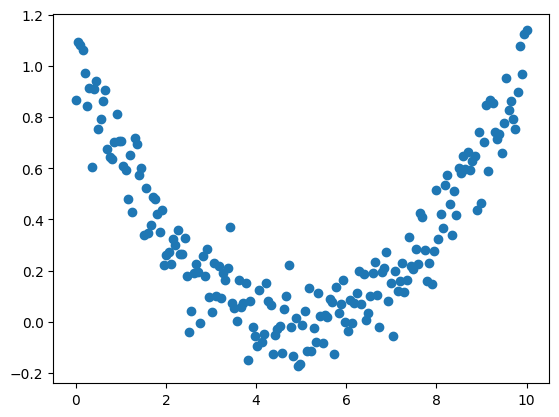

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


0
[[ 0.6819315   0.12725034  0.03804182  0.20478791  0.6145488   0.17041905
  -0.6022377  -0.62907547 -0.00984548 -0.36675113]] [-3.1401131e-03  1.9013043e-04 -1.3926122e-03  3.7539331e-04
 -3.3559350e-04 -1.3173622e-04 -2.8391089e-03 -1.0472011e-03
 -1.4544290e-03 -4.4952489e-05]
1
[[ 0.6847888   0.12480025  0.03404321  0.18736096  0.61511     0.17494507
  -0.5977691  -0.6278011  -0.01501403 -0.36653087]] [-6.2982887e-03  3.0969630e-04 -2.5165016e-03  4.9873535e-04
 -7.0339447e-04 -1.7988050e-04 -5.5216108e-03 -1.9814107e-03
 -2.6147915e-03 -6.3962550e-05]
2
[[ 0.6876781   0.12243541  0.02972399  0.17157844  0.61574477  0.17959069
  -0.59333205 -0.62664187 -0.02004623 -0.36656228]] [-9.5111197e-03  4.3115631e-04 -3.6386945e-03  5.9520826e-04
 -1.1166628e-03 -2.1709212e-04 -8.0816541e-03 -2.8152037e-03
 -3.7435815e-03 -6.1300816e-05]
3
[[ 0.69060487  0.12014189  0.02514778  0.15752284  0.61645514  0.18436591
  -0.58892614 -0.6255993  -0.02484609 -0.36684492]] [-1.2776328e-02  5.5050303

KeyboardInterrupt: 

In [ ]:
data=numpy.linspace(-5,5,200)
noise=numpy.random.normal(0,0.1,data.shape)
y=numpy.square(data/5)+noise

plt.scatter(data,y)# 散点图
plt.show()

model=Sequential()# 按顺序构成的模型，输入层，隐藏层，输出
sgd=SGD(learning_rate=1.5)# 自定义优化算法随机梯度下降法，设置学习率，默认为0.01
# 添加输入层和隐藏层、激活函数
model.add(Dense(units=10,input_dim=1))# DENSE表示全连接层，units=输出值的维度即神经元数量,input_dim=输入值的维度
model.add(Activation('sigmoid'))
model.add(Dense(units=1))# DENSE表示全连接层，units=输出值的维度即神经元数量,input_dim=输入值的维度
model.add(Activation('sigmoid'))

model.compile(optimizer=sgd,loss='mse')# 优化方式,损失函数，评估指标
for i in range(300):
  model.train_on_batch(data, y)# 训练数据，标签，迭代次数，每个批次的样本数
  print(i)
  w,b=model.layers[0].get_weights()# 打印权值和偏置
  print(w,b)

# 训练好的函数
pre=model.predict(data,batch_size=100)
# 画图
plt.scatter(data,y)# 散点图
plt.plot(data,pre,'r-')
plt.show()


>对定义域匹配的敏感程度：ReLU<sigmoid<Tanh

>对值域匹配的敏感程度：ReLU<Tanh<sigmoid
>>sigmoid娇生惯养，但凡它的值域与输出值域不匹配，那就是寄，因此不可以放在输出层

>由以上分析可以看出，其实ReLU才是最好的拟合方式，但是由于对学习率要求过于严格，与其他那俩配合不了，并且输出还是直线，对曲线拟合而言误差太大

##尝试组合不同的激活函数

###与线性激活函数配合

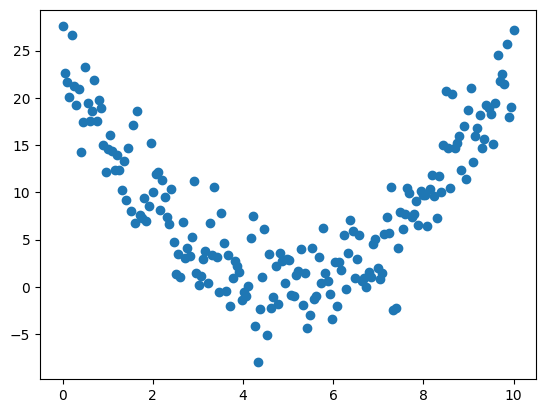

0
[[-0.44664112 -0.49622655  0.723123    0.29609627  0.55823714 -0.3592936
   0.21494143 -0.08150107]] [ 0.          0.         -0.00173194  0.00131607  0.00124323  0.
 -0.00040016  0.        ]
1
[[-0.44664112 -0.49622655  0.71750873  0.30122688  0.5627146  -0.3592936
   0.21430686 -0.08150107]] [ 0.          0.         -0.0030897   0.0024816   0.0021809   0.
 -0.00063695  0.        ]
2
[[-0.44664112 -0.49622655  0.7133535   0.3055509   0.5662967  -0.3592936
   0.21428838 -0.08150107]] [ 0.          0.         -0.00397285  0.00340382  0.00346692  0.
 -0.00066618  0.        ]
3
[[-0.44664112 -0.49622655  0.7089454   0.30716786  0.57410115 -0.3592936
   0.21191984 -0.08150107]] [ 0.          0.         -0.00478709  0.0039453   0.00529142  0.
 -0.00093401  0.        ]
4
[[-0.44664112 -0.49622655  0.70533645  0.30867305  0.5806132  -0.3592936
   0.21017268 -0.08150107]] [ 0.          0.         -0.00544434  0.00443393  0.00692266  0.
 -0.00110376  0.        ]
5
[[-0.44664112 -0.49622655  0

KeyboardInterrupt: 

In [ ]:
data=numpy.linspace(-5,5,200)
noise=numpy.random.normal(0,3,data.shape)
y=numpy.square(data)+noise
data = data

plt.scatter(data,y)# 散点图
plt.show()

model=Sequential()# 按顺序构成的模型，输入层，隐藏层，输出
sgd=SGD(learning_rate=0.003)# 自定义优化算法随机梯度下降法，设置学习率，默认为0.01
model.add(Dense(units=8,input_dim=1))# DENSE表示全连接层，units=输出值的维度即神经元数量,input_dim=输入值的维度
model.add(Activation('relu'))
model.add(Dense(units=8,input_dim=1))# DENSE表示全连接层，units=输出值的维度即神经元数量,input_dim=输入值的维度
model.add(Activation('sigmoid'))
model.add(Dense(units=5,input_dim=1))# DENSE表示全连接层，units=输出值的维度即神经元数量,input_dim=输入值的维度
model.add(Activation('sigmoid'))
model.add(Dense(units=5,input_dim=1))# DENSE表示全连接层，units=输出值的维度即神经元数量,input_dim=输入值的维度
model.add(Activation('relu'))

model.add(Dense(units=1))# DENSE表示全连接层，units=输出值的维度即神经元数量,input_dim=输入值的维度

model.compile(optimizer=sgd,loss='mse')# 优化方式,损失函数，评估指标
for i in range(2000):
  model.train_on_batch(data, y)# 训练数据，标签，迭代次数，每个批次的样本数
  print(i)
  w,b=model.layers[0].get_weights()# 打印权值和偏置
  print(w,b)

# 训练好的函数
pre=model.predict(data,batch_size=100)
# 画图
plt.scatter(data,y)# 散点图
plt.plot(data,pre,'r-')
plt.show()

In [ ]:
loss = model.evaluate(data, y, verbose=0)
print("Loss:", loss)
y_pred = model.predict(data)
std_dev = numpy.std(y - y_pred)
print("Standard Deviation between predicted and true values:", std_dev)

Loss: 8.02059555053711
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Standard Deviation between predicted and true values: 10.727788392410584


>得到结论，ReLU可以与sigmoid，正比例函数等激活函数配合，ReLU调参特性与正比例函数相当接近，与sigmoid配合时学习率必须降低，因此epoch量会显著提升。用ReLU与sigmoid配合可以增加折线数量，但是增加折线的数量小于等于该层神经元的数目，因此可以先用多神经元跑一下，确定能增加的折线数量上限，再减小该层神经元数量，将大幅增加拟合速率

###将sigmoid与ReLU对调

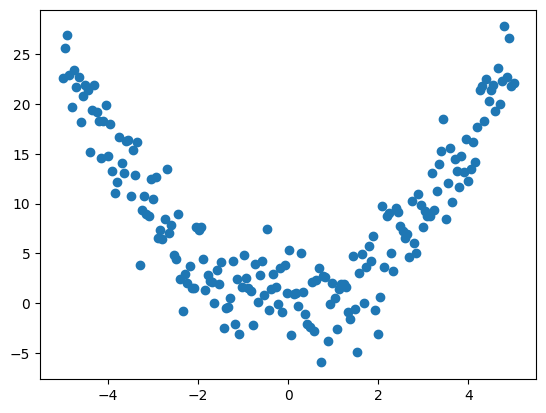

0
[[-0.65631104 -0.4789574  -0.48805317 -0.7026333  -0.38808754 -0.5121065
   0.42709324 -0.518849  ]] [-3.0193203e-05 -5.2249141e-04  7.4258551e-04 -2.3391930e-04
  1.9819657e-03  2.2424961e-04 -1.3431718e-03 -3.9949841e-04]
1
[[-0.6568388  -0.47722304 -0.49074847 -0.7019063  -0.39444676 -0.51266766
   0.42226985 -0.5176421 ]] [ 6.2429339e-05 -1.0341643e-03  1.5117817e-03 -4.5229524e-04
  3.8368842e-03  4.1430996e-04 -2.6116231e-03 -7.6322741e-04]
2
[[-0.65773267 -0.4753566  -0.49370855 -0.70117295 -0.40096638 -0.51316327
   0.41732022 -0.5164454 ]] [ 0.00027063 -0.0015677   0.00234442 -0.00066439  0.00568995  0.00057849
 -0.00388917 -0.00110974]
3
[[-0.65902025 -0.47351107 -0.4969075  -0.7004586  -0.40685803 -0.513687
   0.41215265 -0.51527303]] [ 0.00060207 -0.00207498  0.00322449 -0.00085963  0.00730402  0.00073898
 -0.00518364 -0.00143105]
4
[[-0.6608098  -0.4713774  -0.50054467 -0.6997405  -0.4134484  -0.5140865
   0.40692466 -0.51411754]] [ 0.0010606  -0.00263188  0.00417979 -0.

KeyboardInterrupt: 

In [ ]:
data=numpy.linspace(-5,5,200)
noise=numpy.random.normal(0,3,data.shape)
y=numpy.square(data)+noise

plt.scatter(data,y)# 散点图
plt.show()

model=Sequential()# 按顺序构成的模型，输入层，隐藏层，输出
sgd=SGD(learning_rate=0.01)# 自定义优化算法随机梯度下降法，设置学习率，默认为0.01
# 添加输入层和隐藏层、激活函数

model.add(Dense(units=8,input_dim=1))# DENSE表示全连接层，units=输出值的维度即神经元数量,input_dim=输入值的维度
model.add(Activation('sigmoid'))
model.add(Dense(units=8,input_dim=1))# DENSE表示全连接层，units=输出值的维度即神经元数量,input_dim=输入值的维度
model.add(Activation('relu'))
model.add(Dense(units=5,input_dim=1))# DENSE表示全连接层，units=输出值的维度即神经元数量,input_dim=输入值的维度
model.add(Activation('relu'))
model.add(Dense(units=5,input_dim=1))# DENSE表示全连接层，units=输出值的维度即神经元数量,input_dim=输入值的维度
model.add(Activation('sigmoid'))
model.add(Dense(units=1))# DENSE表示全连接层，units=输出值的维度即神经元数量,input_dim=输入值的维度

model.compile(optimizer=sgd,loss='mse')# 优化方式,损失函数，评估指标
for i in range(1000):
  model.train_on_batch(data, y)# 训练数据，标签，迭代次数，每个批次的样本数
  print(i)
  w,b=model.layers[0].get_weights()# 打印权值和偏置
  print(w,b)

# 训练好的函数
pre=model.predict(data,batch_size=100)
# 画图
plt.scatter(data,y)# 散点图
plt.plot(data,pre,'r-')
plt.show()

>经过多次排列组合后发现，Sigmoid-ReLU组合可以降低输入数据区间的要求，只要求输入数据区间按原点对称即可。若网络中只有两层隐藏层，则sigmoid-ReLU效果比ReLU-sigmoid效果好。若网络具有四层隐藏层，ReLU-sigmoid-sigmoid-ReLU可以进一步平滑多段折线，效果最好

###更改不同层本身的学习速率

In [ ]:
data=numpy.linspace(-5,5,200)
noise=numpy.random.normal(0,3,data.shape)
y=numpy.square(data)+noise
data = data

plt.scatter(data,y)# 散点图
plt.show()

sgd_dense1 = SGD(learning_rate=learning_rate_dense1)
sgd_dense2 = SGD(learning_rate=learning_rate_dense2)
sgd_dense3 = SGD(learning_rate=learning_rate_dense3)
sgd_dense4 = SGD(learning_rate=learning_rate_dense4)
sgd_output = SGD(learning_rate=learning_rate_output)

model=Sequential()# 按顺序构成的模型，输入层，隐藏层，输出
model.add(Dense(units=8,input_dim=1))# DENSE表示全连接层，units=输出值的维度即神经元数量,input_dim=输入值的维度
model.add(Activation('relu'))
model.compile(optimizer=sgd_dense1, loss='mse')
model.add(Dense(units=8,input_dim=1))# DENSE表示全连接层，units=输出值的维度即神经元数量,input_dim=输入值的维度
model.add(Activation('sigmoid'))
model.compile(optimizer=sgd_dense2, loss='mse')
model.add(Dense(units=5,input_dim=1))# DENSE表示全连接层，units=输出值的维度即神经元数量,input_dim=输入值的维度
model.add(Activation('sigmoid'))
model.compile(optimizer=sgd_dense3, loss='mse')
model.add(Dense(units=5,input_dim=1))# DENSE表示全连接层，units=输出值的维度即神经元数量,input_dim=输入值的维度
model.add(Activation('relu'))
model.compile(optimizer=sgd_dense4, loss='mse')

model.add(Dense(units=1))# DENSE表示全连接层，units=输出值的维度即神经元数量,input_dim=输入值的维度
model.compile(optimizer=sgd_output, loss='mse')

for i in range(2000):
  model.train_on_batch(data, y)# 训练数据，标签，迭代次数，每个批次的样本数
  print(i)
  w,b=model.layers[0].get_weights()# 打印权值和偏置
  print(w,b)

# 训练好的函数
pre=model.predict(data,batch_size=100)
# 画图
plt.scatter(data,y)# 散点图
plt.plot(data,pre,'r-')
plt.show()

loss = model.evaluate(data, y, verbose=0)
print("Loss:", loss)
y_pred = model.predict(data)
std_dev = numpy.std(y - y_pred)
print("Standard Deviation between predicted and true values:", std_dev)

#对正弦波进行拟合

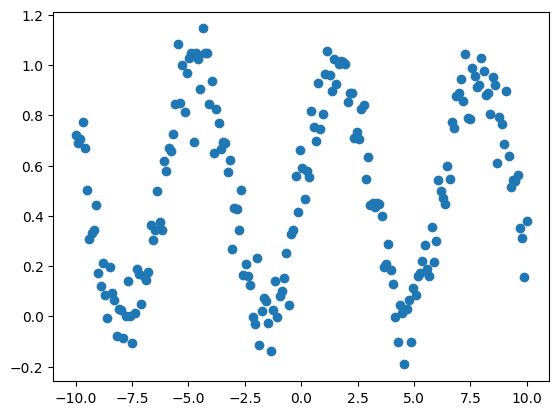

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


0
[[ 0.48486257 -0.63538593  0.00265074 -0.01340419  0.0852798   0.35750988
  -0.19509965  0.17976251  0.34299207 -0.27942422  0.00592422 -0.0084642 ]] [ 0.00196884  0.0003947  -0.0021123  -0.00106307  0.00046421  0.00171134
  0.00056565 -0.00142363 -0.00244343  0.00075761  0.00118063 -0.00063716]
1
[[ 4.8712122e-01 -6.3526911e-01  2.0081480e-04 -1.5198537e-02
   8.6033307e-02  3.5918587e-01 -1.9438723e-01  1.7779830e-01
   3.4031129e-01 -2.7805379e-01  7.0182281e-03 -9.5897308e-03]] [ 0.00283993  0.00028265 -0.00274091 -0.00074326  0.00085753  0.00215738
  0.00041693 -0.00197295 -0.00338947  0.00053478  0.00124834 -0.00045297]
2
[[ 4.8871666e-01 -6.3514405e-01  2.0081480e-04 -1.7335791e-02
   8.6958818e-02  3.5984150e-01 -1.9353291e-01  1.7637962e-01
   3.3856019e-01 -2.7619085e-01  7.1382928e-03 -1.1446840e-02]] [ 3.4838549e-03  2.4342927e-04 -2.7409075e-03 -4.5954931e-04
  1.1783704e-03  2.4430067e-03  2.6227254e-04 -2.3628464e-03
 -4.0640105e-03  1.6040829e-04  1.2520575e-03  5.378

3
[[ 4.9034882e-01 -6.3509423e-01  2.0081480e-04 -1.9274671e-02
   8.7915421e-02  3.6050954e-01 -1.9277833e-01  1.7492862e-01
   3.3677188e-01 -2.7446029e-01  7.2400537e-03 -1.3230155e-02]] [ 0.004141    0.0002267  -0.00274091 -0.00021538  0.00150725  0.00273378
  0.00012786 -0.00275889 -0.00474897 -0.00019132  0.00125297  0.00055251]
4
[[ 4.9189052e-01 -6.3506603e-01  2.0081480e-04 -2.1138396e-02
   8.8833883e-02  3.6113536e-01 -1.9207436e-01  1.7354229e-01
   3.3508411e-01 -2.7279586e-01  7.3226951e-03 -1.4968669e-02]] [ 4.7833244e-03  2.1697415e-04 -2.7409075e-03  1.6469101e-05
  1.8295312e-03  3.0173708e-03  2.3050961e-06 -3.1418223e-03
 -5.4141716e-03 -5.3267245e-04  1.2516129e-03  1.0452103e-03]


流式输出内容被截断，只能显示最后 5000 行内容。
   1.6395083e-01  3.1094801e-01 -2.9857820e-01  2.5166482e-01
   5.2179569e-01 -2.4270847e-01  1.4141114e-01 -1.5990028e-01]] [ 0.29564634  0.0147298  -0.00274091  0.06818703  0.14170653  0.12186006
 -0.07083653 -0.18293168 -0.36730444 -0.13939276 -0.0776402   0.16825509]
1002
[[ 5.1033169e-01 -6.5840399e-01  2.0081480e-04 -1.2621436e-01
   1.6702560e-01  3.1342351e-01 -2.9961738e-01  2.5032216e-01
   5.1643801e-01 -2.4566595e-01  1.4219576e-01 -1.5534160e-01]] [ 0.29726452  0.01428991 -0.00274091  0.0680415   0.14255716  0.12255414
 -0.07082489 -0.18375249 -0.36922413 -0.13904297 -0.07789368  0.16737577]
1003
[[ 5.0433177e-01 -6.6070932e-01  2.0081480e-04 -1.2747221e-01
   1.6431817e-01  3.1085753e-01 -2.9882634e-01  2.5194624e-01
   5.2208930e-01 -2.4284904e-01  1.4160705e-01 -1.6009486e-01]] [ 0.29626706  0.01451001 -0.00274091  0.0683878   0.14207521  0.12217971
 -0.07132085 -0.18374833 -0.36871818 -0.13986173 -0.07816242  0.16857234]
1004
[[ 5.1077199e-0

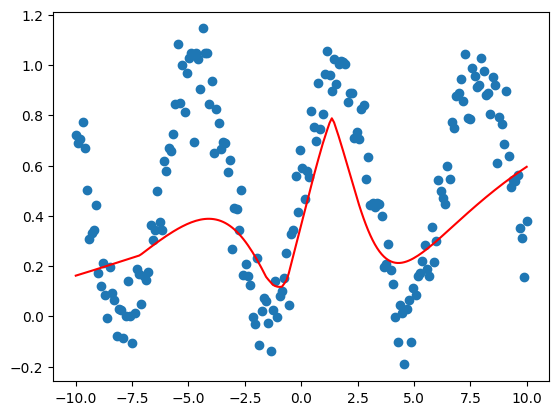

In [2]:
data=numpy.linspace(-10,10,200)
noise=numpy.random.normal(0,0.1,data.shape)
y=(numpy.sin(data)+1)/2+noise

plt.scatter(data,y)# 散点图
plt.show()

model=Sequential()# 按顺序构成的模型，输入层，隐藏层，输出
sgd=SGD(learning_rate=0.15)# 自定义优化算法随机梯度下降法，设置学习率，默认为0.01
# 添加输入层和隐藏层、激活函数
model.add(Dense(units=12,input_dim=1))# DENSE表示全连接层，units=输出值的维度即神经元数量,input_dim=输入值的维度
model.add(Activation('relu'))
model.add(Dense(units=12,input_dim=1))# DENSE表示全连接层，units=输出值的维度即神经元数量,input_dim=输入值的维度
model.add(Activation('sigmoid'))
model.add(Dense(units=5,input_dim=1))# DENSE表示全连接层，units=输出值的维度即神经元数量,input_dim=输入值的维度
model.add(Activation('sigmoid'))
model.add(Dense(units=5,input_dim=1))# DENSE表示全连接层，units=输出值的维度即神经元数量,input_dim=输入值的维度
model.add(Activation('relu'))
model.add(Dense(units=1))# DENSE表示全连接层，units=输出值的维度即神经元数量,input_dim=输入值的维度

model.compile(optimizer=sgd,loss='mse')# 优化方式,损失函数，评估指标
for i in range(2000):
  model.train_on_batch(data, y)# 训练数据，标签，迭代次数，每个批次的样本数
  print(i)
  w,b=model.layers[0].get_weights()# 打印权值和偏置
  print(w,b)

# 训练好的函数
pre=model.predict(data,batch_size=100)
# 画图
plt.scatter(data,y)# 散点图
plt.plot(data,pre,'r-')
plt.show()


In [5]:
# 再练 2000 epoch
for i in range(2000):
  model.train_on_batch(data, y)# 训练数据，标签，迭代次数，每个批次的样本数
  print(i)
  w,b=model.layers[0].get_weights()# 打印权值和偏置
  print(w,b)

流式输出内容被截断，只能显示最后 5000 行内容。
1000
[[ 8.1977201e-01 -8.5966504e-01  2.0081480e-04 -7.1458176e-02
   4.4350323e-01  3.5890919e-01 -3.1798464e-01  7.0556623e-01
   1.0529670e+00 -2.2451356e-01  4.0936971e-01 -2.6643738e-01]] [ 0.8108652  -1.7757992  -0.00274091  0.5507103   0.68251896  0.44655323
 -0.9873498  -1.0097388  -1.6382158  -0.83913594 -0.9404203   0.21825816]
1001
[[ 8.1836963e-01 -8.6373085e-01  2.0081480e-04 -6.7331716e-02
   4.4386351e-01  3.5850132e-01 -3.1700298e-01  7.0613241e-01
   1.0524777e+00 -2.2632258e-01  4.0720189e-01 -2.6583713e-01]] [ 0.8099746  -1.7754842  -0.00274091  0.5504239   0.6820604   0.44578934
 -0.9877327  -1.0092161  -1.6379311  -0.8389209  -0.94072205  0.21834171]
1002
[[ 8.1991595e-01 -8.6020857e-01  2.0081480e-04 -7.1220815e-02
   4.4365549e-01  3.5900155e-01 -3.1797555e-01  7.0582527e-01
   1.0530622e+00 -2.2466017e-01  4.0937492e-01 -2.6646653e-01]] [ 0.8109453  -1.7758585  -0.00274091  0.5509067   0.6826256   0.44659007
 -0.9874391  -1.0097536  -1

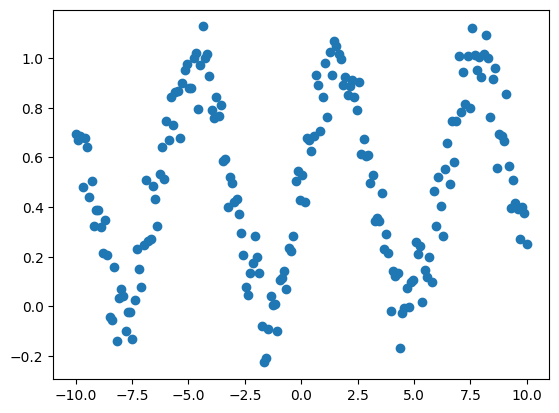

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


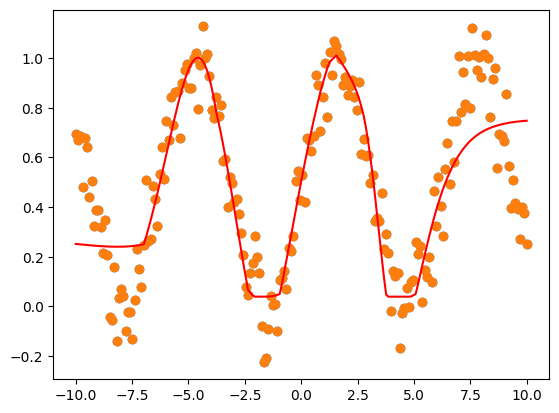

In [6]:
data=numpy.linspace(-10,10,200)
noise=numpy.random.normal(0,0.1,data.shape)
y=(numpy.sin(data)+1)/2+noise

plt.scatter(data,y)# 散点图
plt.show()

plt.scatter(data,y)# 散点图
# 训练好的函数
pre=model.predict(data,batch_size=100)
# 画图
plt.scatter(data,y)# 散点图
plt.plot(data,pre,'r-')
plt.show()

In [ ]:
loss = model.evaluate(data, y, verbose=0)
print("Loss:", loss)
y_pred = model.predict(data)
std_dev = numpy.std(y - y_pred)
print("Standard Deviation between predicted and true values:", std_dev)

Loss: 0.01362701877951622
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Standard Deviation between predicted and true values: 0.5061831473551084


#对周期函数进行特征值拆解的拟合

In [ ]:
data=numpy.linspace(-10,10,200)
noise=numpy.random.normal(0,0.1,data.shape)
y=(numpy.sin(data)+1)/2+noise

plt.scatter(data,y)# 散点图
plt.show()